# konlpy 형태소 분석기 성능비교

#https://liveyourit.tistory.com/56

#위 사이트 참고하기

#나의 환경은 '파이썬3.8,윈도우10*64'이다

#오류 해결방안  1

https://joyhong.tistory.com/127
위사이트 참고했음

#mecab 오류 :The MeCab dictionary does not exist 해결방안 2
https://blog.naver.com/readwritespeak/221714120427

In [1]:
from konlpy.tag import Mecab
mecab = Mecab(dicpath='C:\mecab\mecab-ko-dic')
print(mecab.morphs(u'서울대입구역의.'))

['서울대입구역', '의', '.']


In [2]:
from konlpy.tag import Kkma
from konlpy.tag import Komoran
from konlpy.tag import Hannanum
from konlpy.tag import Okt

# 형태소 분석을 위한 객체 생성.
kkma = Kkma()
komoran = Komoran()
hannanum = Hannanum()
okt = Okt()

## 문장 분석 품질 비교

> ### 1. 띄어쓰기가 제대로 되어있지 않은 문장

In [3]:
text = "아버지가방에들어가신다"

In [4]:
# 꼬꼬마 형태소 분석 결과
kkma.pos(text)

[('아버지', 'NNG'),
 ('가방', 'NNG'),
 ('에', 'JKM'),
 ('들어가', 'VV'),
 ('시', 'EPH'),
 ('ㄴ다', 'EFN')]

In [5]:
# 코모란 형태소 분석 결과
komoran.pos(text)

[('아버지', 'NNG'),
 ('가방', 'NNP'),
 ('에', 'JKB'),
 ('들어가', 'VV'),
 ('시', 'EP'),
 ('ㄴ다', 'EC')]

In [6]:
hannanum.pos(text)

[('아버지가방에들어가', 'N'), ('이', 'J'), ('시ㄴ다', 'E')]

In [7]:
mecab.pos(text)

[('아버지', 'NNG'),
 ('가', 'JKS'),
 ('방', 'NNG'),
 ('에', 'JKB'),
 ('들어가', 'VV'),
 ('신다', 'EP+EC')]

In [8]:
okt.pos(text)

[('아버지', 'Noun'), ('가방', 'Noun'), ('에', 'Josa'), ('들어가신다', 'Verb')]

> ### 2. 오탈자 때문에 불완전한 문장

In [9]:
text2 = "ㄱㅐㄴㅏ리가 피어있는 동산에 누워있고싶ㄷㅏ"

In [10]:
# 꼬꼬마 형태소 결과 출력하기.

print("꼬꼬마 : %s\n" % kkma.pos(text2))
print("코모란 : %s\n" % komoran.pos(text2))
print("한나눔 : %s\n" % hannanum.pos(text2))
print("mecab : %s\n" % mecab.pos(text2))
print("Okt : %s\n" % okt.pos(text2))

꼬꼬마 : [('ㄱㅐㄴㅏ리', 'UN'), ('가', 'JKS'), ('피', 'VV'), ('어', 'ECD'), ('있', 'VXV'), ('는', 'ETD'), ('동산', 'NNG'), ('에', 'JKM'), ('눕', 'VV'), ('어', 'ECS'), ('있', 'VV'), ('고', 'ECE'), ('싶ㄷㅏ', 'UN')]

코모란 : [('개나리', 'NNP'), ('가', 'JKS'), ('피', 'VV'), ('어', 'EC'), ('있', 'VX'), ('는', 'ETM'), ('동산', 'NNP'), ('에', 'JKB'), ('눕', 'VV'), ('어', 'EC'), ('있', 'VX'), ('고', 'EC'), ('싶', 'VX'), ('다', 'EC')]

한나눔 : [('ㄱㅐㄴㅏ리', 'N'), ('가', 'J'), ('피', 'P'), ('어', 'E'), ('있', 'P'), ('는', 'E'), ('동산', 'N'), ('에', 'J'), ('누워있고싶ㄷㅏ', 'N')]

mecab : [('ㄱ', 'NNG'), ('ㅐㄴㅏ리가', 'UNKNOWN'), ('피', 'VV'), ('어', 'EC'), ('있', 'VX'), ('는', 'ETM'), ('동산', 'NNG'), ('에', 'JKB'), ('누워', 'VV+EC'), ('있', 'VX'), ('고', 'EC'), ('싶', 'VX'), ('ㄷ', 'NNG'), ('ㅏ', 'UNKNOWN')]

Okt : [('ㄱㅐㄴㅏ', 'KoreanParticle'), ('리가', 'Noun'), ('피어있는', 'Verb'), ('동산', 'Noun'), ('에', 'Josa'), ('누워있고싶', 'Verb'), ('ㄷㅏ', 'KoreanParticle')]



> ### 3. 속도 비교

In [11]:
text3 = """5G 이동통신망을 빌려 사용하는 ‘5G 알뜰폰’이 올해 도입되고, 내년부터는 의무화된다.
정부는 알뜰폰 사업자(MNVO)가 통신사(MNO)에 통신망을 빌리는 비용(도매대가)을 지난해보다 큰 폭으로 낮춰, 알뜰폰 요금 인하를 유도하기로 했다. 하지만 줄어드는 알뜰폰 시장을 살릴 수 있을지는 지켜봐야 하는 상황이다.
과학기술정보통신부는 알뜰폰 활성화 추진대책을 25일 발표했다. 알뜰폰 가입자는 800만명으로 이동통신 시장의 12%를 차지한다. 2011년 출시 뒤 저렴한 요금제로 통신비 부담을 낮춰왔다. 하지만 지난해 5월 통신 3사가 준보편제 요금을 내놓은 이후 알뜰폰 이탈 현상이 지속되고 있다.
우선 올해 안에 3개 이상의 5G 알뜰폰이 시장에 나온다. 통신사가 5G망을 알뜰폰 사업자에게 도매 제공할지 여부는 통신사 자율로 정한다. 앞서 LG유플러스는 오는 10월 알뜰폰 사업을 시작하는 KB국민은행에 5G망을 제공한다고 밝힌 바 있다. SK텔레콤와 KT도 특정 제휴사를 선택해 올해 안에 5G 알뜰폰을 내놓기로 했다.
내년부터는 5G 알뜰폰 제공이 의무화된다. 지난 22일자로 종료된 도매제공 의무제도의 유효기간을 2022년 9월22일까지 연장하는 전기통신사업법 개정안이 국회에서 통과되면, 관련 고시를 개정해 SK텔레콤의 5G망 도매제공을 의무화하겠다는 것이다.
과기정통부 관계자는 “SK텔레콤이 자사와 계약을 맺은 13개 알뜰폰 사업자에게 5G망을 의무 제공하면, 그 외 31개의 알뜰폰 사업자들이 경쟁에서 밀릴 것을 우려해 KT와 LG유플러스도 5G망을 제공하게 될 것”이라고 내다봤다.
알뜰폰 사업자가 상품을 만드는 방식 크게 2가지다. 하나는 통신사로부터 음성·문자·데이터를 도매로 사들인 뒤 이를 바탕으로 통신사보다 저렴한 요금제를 내놓는 방식(종량제 도매제공)이다. 이를 위해 정부는 도매대가 인하율을 음성 17.8%, 데이터 19.2%, 단문메시지 1.15%로, 지난해 음성 15.1%, 데이터 19.1%, 단문메시지 1.13%에 비해 높여 잡았다.
또 다른 방식은 일정비용을 통신사에 내고 통신사의 정액 요금제를 그대로 판매하면서, 그 차액의 범위에서 저렴한 요금제를 내놓는 방식(수익배분 도매제공)이다. 정부는 SK텔레콤의 준보편 요금제인 ‘T플랜 요금제’를 알뜰폰 사업자가 재판매할 수 있게 했다. 기존에 SK텔레콤이 도매제공했던 ‘밴드데이터 요금제’의 최고구간의 대가도 1.5%포인트 낮췄다.
알뜰폰 업계는 대체로 반기는 분위기지만, 알뜰폰 시장을 살릴 수 있을지에는 의구심을 갖고 있다. 업계 관계자는 “도매대가 인하율이 크고, 5G망을 제공하는 것은 긍정적”이라면서도 “수익배분 도매제공의 의무화, 설비를 가진 업체에 대한 접속료 정산 도입 등의 제도적 개선이 필요하다”고 말했다."""

In [12]:
%%time
print(kkma.pos(text3)[:5])

[('5', 'NR'), ('G', 'OL'), ('이동', 'NNG'), ('통신망', 'NNG'), ('을', 'JKO')]
Wall time: 2.78 s


In [13]:
%%time
print(komoran.pos(text3)[:5])

[('5', 'SN'), ('G', 'SL'), ('이동', 'NNG'), ('통신망', 'NNG'), ('을', 'JKO')]
Wall time: 52.1 ms


In [14]:
%%time
print(hannanum.pos(text3)[:5])

[('5G', 'N'), ('이동통신망', 'N'), ('을', 'J'), ('빌리', 'P'), ('어', 'E')]
Wall time: 1.24 s


In [15]:
%%time
print(mecab.pos(text3)[:5])

[('5', 'SN'), ('G', 'SL'), ('이동', 'NNG'), ('통신망', 'NNG'), ('을', 'JKO')]
Wall time: 393 ms


In [16]:
%%time
print(okt.pos(text3)[:5])

[('5', 'Number'), ('G', 'Alpha'), ('이', 'Determiner'), ('동', 'Modifier'), ('통신망', 'Noun')]
Wall time: 328 ms


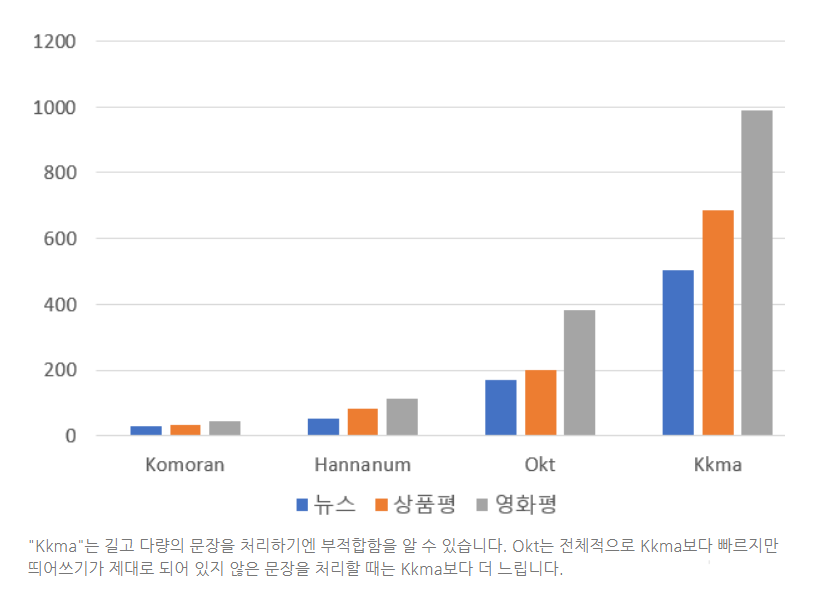

In [17]:
# 먼저 패키지를 설치하고

#  !pip install IPython 
from IPython.display import Image  # 주피터 노트북에 이미지 삽입


Image("Performance.png")

*  보통의 정확도를 원한다면 "Komoran" 또는 "Hannanum" (이번 분석 중 Komoran의 놀라운 발전에 감짝 놀랐습니다.)속도는 느리더라도 정확하고 상세한 품사 정보를 원한다면 "Kkma"어느 정도의 띄어쓰기 되어 있는 "인터넷" 영화평/상품명을 처리할 땐 "Okt"(만약 띄어쓰기가 없다면 느린 처리속도는 감수해야함)
